In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox

In [2]:
train = pd.read_csv("../input/train.csv")

In [3]:
train.shape

(6500, 20)

In [4]:
train.head(10)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
5,fffe3300390039003900,Tracy Francis,0.99,46.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,NaN,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",-1922.78
6,fffe3800360033003700,David Hawes,0.64,17.0,9.0,7264.0,Brass,8.26,90.67,No,Yes,No,Roadways,No,Working Class,No,06/05/16,06/02/16,"South Matthew, WV 76033",-1536.66
7,fffe3800300039003800,David Osher,0.74,23.0,10.0,3287.0,Clay,12.81,13.25,Yes,No,No,Waterways,Yes,Wealthy,No,06/04/19,05/31/19,"Davidmouth, CA 37824",-422.42
8,fffe3800330032003900,Arnold Reel,0.00,6.0,4.0,108.0,Clay,3.98,19.76,Yes,No,No,Waterways,Yes,Working Class,Yes,08/27/18,08/23/18,"Lisaville, ND 43925",-160.10
9,fffe3800310031003800,James Comfort,0.12,23.0,9.0,195226.0,Marble,245.63,49.25,No,No,No,Roadways,No,Working Class,No,07/14/16,07/10/16,"Jacobland, WV 85997",-834.27


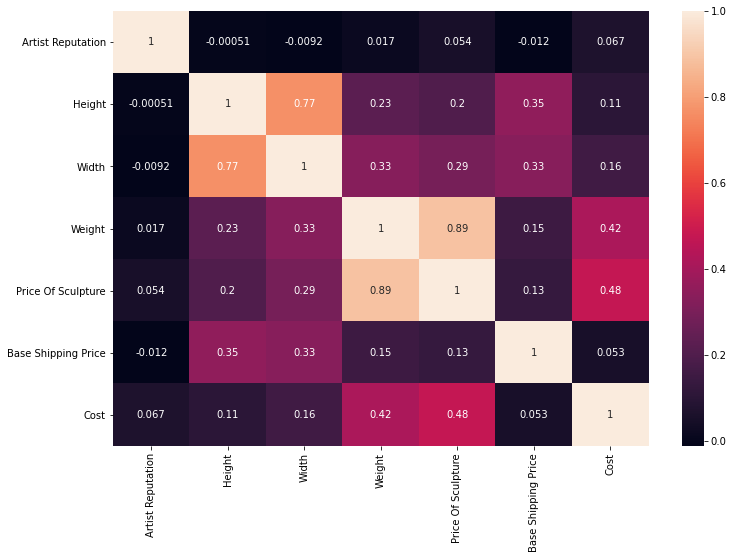

In [5]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True)

(array([3427.,  868.,  659.,  506.,  392.,  310.,  190.,   99.,   44.,
           5.]),
 array([ 1.09861229,  2.27416956,  3.44972683,  4.6252841 ,  5.80084137,
         6.97639864,  8.15195591,  9.32751318, 10.50307045, 11.67862772,
        12.85418499]),
 <a list of 10 Patch objects>)

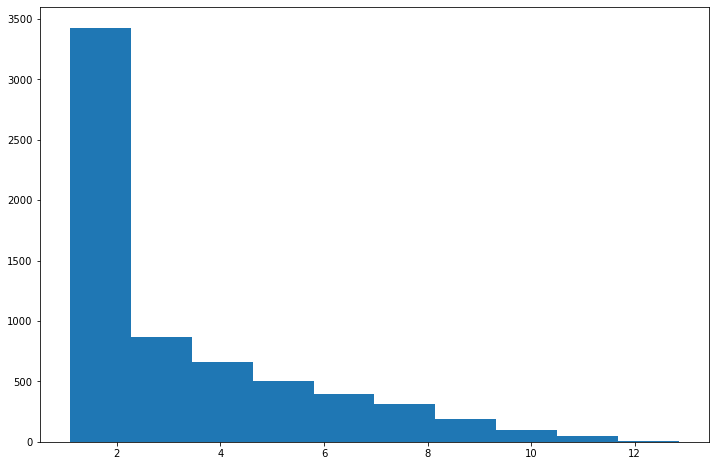

In [13]:
plt.figure(figsize=(12,8))
plt.hist(np.log(train['Price Of Sculpture']))

In [ ]:
plt.figure(figsize=(10,8))
num_cols = ["Artist Reputation", "Height", "Width", "Price Of Sculpture", "Base Shipping Price", "Weight"]
for col in num_cols:
    plt.hist(train[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
train['Weight'] = np.log(train['Weight'])

In [ ]:
plt.scatter(x=train['Artist Reputation'], y=train['Weight'], alpha=0.5)

In [ ]:
plt.hist(boxcox(train['Price Of Sculpture'], -0.3))

In [ ]:
train['Remote Location'].value_counts(normalize=True)


In [ ]:
from scipy.stats import boxcox

# num_cols = ["Price Of Sculpture", "Base Shipping Price", "Weight"] # "Artist Reputation"
for col in num_cols:
    try:
        train[col], lam = boxcox(train[col])
        print(f"{col}: {lam}")
    except:
        continue

In [ ]:
plt.figure(figsize=(10,8))
num_cols = ["Artist Reputation", "Height", "Width", "Price Of Sculpture", "Base Shipping Price", "Weight"]
for col in num_cols:
    plt.hist(train[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
num_bins = int(np.floor(1 + np.log2(len(train['Price Of Sculpture']))))
num_bins

In [ ]:
train.groupby('Material')['Price Of Sculpture'].mean()

In [ ]:
train['price_bins'] = pd.cut(train['Price Of Sculpture'], bins=13, labels=False)

In [ ]:
train['price_bins'].value_counts()

In [ ]:
train['Material'] = train.groupby('price_bins')['Material'].apply(lambda x: x.fillna(x.value_counts().idxmax()))

In [ ]:
plt.hist(x=train['Cost'])

In [ ]:
train.info()

In [ ]:
num_cols = ["Artist Reputation", "Height", "Width", "Price Of Sculpture", "Base Shipping Price"]

In [ ]:
train.isna().sum()

In [ ]:
train.describe()

# Impute missing values

In [ ]:
# num_cols
num_cols = ['Artist Reputation', 'Height', 'Width', 'Weight']

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)

knn_imputer.fit(train[num_cols])

new_X = knn_imputer.transform(train[num_cols])

In [ ]:
new_X

In [ ]:
train[num_cols] = new_X

In [ ]:
# cat_cols
cat_cols = ['Transport', 'Remote Location']
train['price_bins'] = pd.cut(train['Price Of Sculpture'], bins=13, labels=False)
train['Material'] = train.groupby('price_bins')['Material'].apply(lambda x: x.fillna(x.value_counts().idxmax()))

for col in cat_cols:
    train.loc[:, col] = train[col].fillna("NONE")

In [ ]:
train['Remote Location'].value_counts()

In [ ]:
train['Cost'] = train['Cost'].abs()

In [ ]:
codes = []

for address in train['Customer Location']:
    if ',' in address:
        code = (address.split(',')[1]).split(' ')[2]
    else:
        code = address.split(' ')[2]
        
    codes.append(code)
    
train['Code'] = codes

In [ ]:
cities = []

for address in train['Customer Location']:
    if ',' in address:
        city = address.split(',')[0]
    else:
        city = address.split(' ')[0]
        
    cities.append(city)
    
train['City'] = cities

In [ ]:
states = []

for address in train['Customer Location']:
    if ',' in address:
        state = (address.split(',')[1]).split(' ')[1]
    else:
        state = address.split(' ')[1]
        
    states.append(state)
    
train['State'] = states

In [ ]:
train.drop(['Customer Location'], axis=1, inplace=True)

# datetime cols

In [ ]:
datetime_cols = ['Scheduled Date', 'Delivery Date']

for col in datetime_cols:
    train.loc[:, col] = pd.to_datetime(train[col], format='%m/%d/%y')

In [ ]:
for col in datetime_cols:
    string = (col.split(' ')[0]).lower()
    train.loc[:, string + '_year'] = train[col].dt.year
    train.loc[:, string + '_weekofyear'] = train[col].dt.weekofyear
    train.loc[:, string + '_month'] = train[col].dt.month
    train.loc[:, string + '_dayofweek'] = train[col].dt.dayofweek
    train.loc[:, string + '_weekend'] = (train[col].dt.weekday >= 5).astype(int)

In [ ]:
train.drop(datetime_cols, axis=1, inplace=True)

In [ ]:
train.drop(['Artist Name'], axis=1, inplace=True)

In [ ]:
train.to_csv("../input/train_cleaned_1.csv", index=False)

In [ ]:
train.describe()

# Clean test

In [ ]:
test = pd.read_csv("../input/test.csv")

In [ ]:
test.isna().sum()

In [ ]:
# num_cols
num_cols = ['Artist Reputation', 'Height', 'Width', 'Weight']

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)

knn_imputer.fit(test[num_cols])

test[num_cols] = knn_imputer.transform(test[num_cols])

In [ ]:
# cat_cols
cat_cols = ['Transport', 'Remote Location']
test['price_bins'] = pd.cut(test['Price Of Sculpture'], bins=13, labels=False)
test['Material'] = test.groupby('price_bins')['Material'].apply(lambda x: x.fillna(x.value_counts().idxmax()))

for col in cat_cols:
    test.loc[:, col] = test[col].fillna("NONE")

In [ ]:
cities = []

for address in test['Customer Location']:
    if ',' in address:
        city = address.split(',')[0]
    else:
        city = address.split(' ')[0]
        
    cities.append(city)
    
test['City'] = cities

In [ ]:
states = []

for address in test['Customer Location']:
    if ',' in address:
        state = (address.split(',')[1]).split(' ')[1]
    else:
        state = address.split(' ')[1]
        
    states.append(state)
    
test['State'] = states

In [ ]:
codes = []

for address in test['Customer Location']:
    if ',' in address:
        code = (address.split(',')[1]).split(' ')[2]
    else:
        code = address.split(' ')[2]
        
    codes.append(code)
    
test['Code'] = codes

In [ ]:
test.drop('Customer Location', axis=1, inplace=True)

In [ ]:
datetime_cols = ['Scheduled Date', 'Delivery Date']

for col in datetime_cols:
    test.loc[:, col] = pd.to_datetime(test[col], format='%m/%d/%y')

In [ ]:
for col in datetime_cols:
    string = (col.split(' ')[0]).lower()
    test.loc[:, string + '_year'] = test[col].dt.year
    test.loc[:, string + '_weekofyear'] = test[col].dt.weekofyear
    test.loc[:, string + '_month'] = test[col].dt.month
    test.loc[:, string + '_dayofweek'] = test[col].dt.dayofweek
    test.loc[:, string + '_weekend'] = (test[col].dt.weekday >= 5).astype(int)

In [ ]:
test.drop(datetime_cols, axis=1, inplace=True)

In [ ]:
test.drop(['Artist Name'], axis=1, inplace=True)

In [ ]:
test.to_csv("../input/test_cleaned_1.csv", index=False)

# Transformation

In [ ]:
from scipy.stats import boxcox

In [ ]:
train_cleaned = pd.read_csv("../input/train_cleaned.csv")

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(np.log(train_cleaned['Cost']))

In [ ]:
max(np.log(train_cleaned['Cost']))

In [ ]:
train_cleaned['Cost'], lam = boxcox(train_cleaned['Cost'])
print('Lambda: %f' % lam)

In [ ]:
import seaborn as sns
sns.histplot(boxcox(train_cleaned['Cost'], -0.398686))

In [ ]:
train_cleaned.columns

In [ ]:
df = pd.read_csv("../submissions/lbl_cb.csv")

In [ ]:
df[df.Cost == np.nan]

In [ ]:
df.describe()

In [ ]:
df = pd.read_csv("../submissions/lbl_cb.csv")

In [ ]:
df[df.Cost == np.nan]